In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scanpy as sc

from sciso.plot import *

In [2]:
set_nature_style()

In [3]:
# Input
data_dir = Path(r"/media/buglakova/embl_data/data/lipid_isotope/20220411_AB_DKFZACLYac") 
anndata_dir = data_dir / "anndata"
adata_path = anndata_dir / "aclykd_adata_concat_fit.h5ad"
adata_am_path =anndata_dir / "aclykd_adata_am_concat.h5ad"

# Output
plots_path = data_dir / "uptake_heterogenety_plots"
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

In [4]:
adata = sc.read_h5ad(adata_path)

In [7]:
adata.var[adata.var.name == "oleate"]

index     annotation_id         formula adduct  \
C18H34O2-H            0        C18H34O2-H        C18H34O2     -H   
[13C]C17H34O2-H       1   [13C]C17H34O2-H   [13C]C17H34O2     -H   
[13C]2C16H34O2-H      2  [13C]2C16H34O2-H  [13C]2C16H34O2     -H   
[13C]3C15H34O2-H      3  [13C]3C15H34O2-H  [13C]3C15H34O2     -H   
[13C]4C14H34O2-H      4  [13C]4C14H34O2-H  [13C]4C14H34O2     -H   
[13C]5C13H34O2-H      5  [13C]5C13H34O2-H  [13C]5C13H34O2     -H   
[13C]6C12H34O2-H      6  [13C]6C12H34O2-H  [13C]6C12H34O2     -H   
[13C]7C11H34O2-H      7  [13C]7C11H34O2-H  [13C]7C11H34O2     -H   
[13C]8C10H34O2-H      8  [13C]8C10H34O2-H  [13C]8C10H34O2     -H   
[13C]9C9H34O2-H       9   [13C]9C9H34O2-H   [13C]9C9H34O2     -H   
[13C]10C8H34O2-H     10  [13C]10C8H34O2-H  [13C]10C8H34O2     -H   
[13C]11C7H34O2-H     11  [13C]11C7H34O2-H  [13C]11C7H34O2     -H   
[13C]12C6H34O2-H     12  [13C]12C6H34O2-H  [13C]12C6H34O2     -H   
[13C]13C5H34O2-H     13  [13C]13C5H34O2-H  [13C]13C5H34O2     -H   
[13C]14C4H34O2-H     14  [13C]14C4H34O2-H  [13C]14C4H34O2     -H   
[13C]15C3H34O2-H     15  [13C]15C3H34O2-H  [13C]15C3H34O2     -H   
[13C]16C2H34O2-H     16  [13C]16C2H34O2-H  [13C]16C2H34O2     -H   
[13C]17CH34O2-H      17   [13C]17CH34O2-H   [13C]17CH34O2     -H   
[13C]18H34O2-H       18    [13C]18H34O2-H    [13C]18H34O2     -H   

                      ionFormula                ion          mz       msm  \
C18H34O2-H              C18H33O2        C18H34O2-H-  281.248565  0.924278   
[13C]C17H34O2-H    [13C]C17H33O2   [13C]C17H34O2-H-  282.251920  0.924278   
[13C]2C16H34O2-H  [13C]2C16H33O2  [13C]2C16H34O2-H-  283.255275  0.924278   
[13C]3C15H34O2-H  [13C]3C15H33O2  [13C]3C15H34O2-H-  284.258630  0.924278   
[13C]4C14H34O2-H  [13C]4C14H33O2  [13C]4C14H34O2-H-  285.261985  0.924278   
[13C]5C13H34O2-H  [13C]5C13H33O2  [13C]5C13H34O2-H-  286.265340  0.924278   
[13C]6C12H34O2-H  [13C]6C12H33O2  [13C]6C12H34O2-H-  287.268695  0.924278   
[13C]7C11H34O2-H  [13C]7C11H33O2  [13C]7C11H34O2-H-  288.272050  0.924278   
[13C]8C10H34O2-H  [13C]8C10H33O2  [13C]8C10H34O2-H-  289.275405  0.924278   
[13C]9C9H34O2-H    [13C]9C9H33O2   [13C]9C9H34O2-H-  290.278760  0.924278   
[13C]10C8H34O2-H  [13C]10C8H33O2  [13C]10C8H34O2-H-  291.282115  0.924278   
[13C]11C7H34O2-H  [13C]11C7H33O2  [13C]11C7H34O2-H-  292.285470  0.924278   
[13C]12C6H34O2-H  [13C]12C6H33O2  [13C]12C6H34O2-H-  293.288825  0.924278   
[13C]13C5H34O2-H  [13C]13C5H33O2  [13C]13C5H34O2-H-  294.292180  0.924278   
[13C]14C4H34O2-H  [13C]14C4H33O2  [13C]14C4H34O2-H-  295.295535  0.924278   
[13C]15C3H34O2-H  [13C]15C3H33O2  [13C]15C3H34O2-H-  296.298890  0.924278   
[13C]16C2H34O2-H  [13C]16C2H33O2  [13C]16C2H34O2-H-  297.302245  0.924278   
[13C]17CH34O2-H    [13C]17CH33O2   [13C]17CH34O2-H-  298.305600  0.924278   
[13C]18H34O2-H      [13C]18H33O2    [13C]18H34O2-H-  299.308955  0.924278   

                   fdr                        databases  \
C18H34O2-H        0.05  [["SwissLipids", "2018-02-02"]]   
[13C]C17H34O2-H   0.05  [["SwissLipids", "2018-02-02"]]   
[13C]2C16H34O2-H  0.05  [["SwissLipids", "2018-02-02"]]   
[13C]3C15H34O2-H  0.05  [["SwissLipids", "2018-02-02"]]   
[13C]4C14H34O2-H  0.05  [["SwissLipids", "2018-02-02"]]   
[13C]5C13H34O2-H  0.05  [["SwissLipids", "2018-02-02"]]   
[13C]6C12H34O2-H  0.05  [["SwissLipids", "2018-02-02"]]   
[13C]7C11H34O2-H  0.05  [["SwissLipids", "2018-02-02"]]   
[13C]8C10H34O2-H  0.05  [["SwissLipids", "2018-02-02"]]   
[13C]9C9H34O2-H   0.05  [["SwissLipids", "2018-02-02"]]   
[13C]10C8H34O2-H  0.05  [["SwissLipids", "2018-02-02"]]   
[13C]11C7H34O2-H  0.05  [["SwissLipids", "2018-02-02"]]   
[13C]12C6H34O2-H  0.05  [["SwissLipids", "2018-02-02"]]   
[13C]13C5H34O2-H  0.05  [["SwissLipids", "2018-02-02"]]   
[13C]14C4H34O2-H  0.05  [["SwissLipids", "2018-02-02"]]   
[13C]15C3H34O2-H  0.05  [["SwissLipids", "2018-02-02"]]   
[13C]16C2H34O2-H  0.05  [["SwissLipids", "2018-02-02"]]   
[13C]17CH34O2-H   0.05  [["SwissLipids", "2018-02-02"]

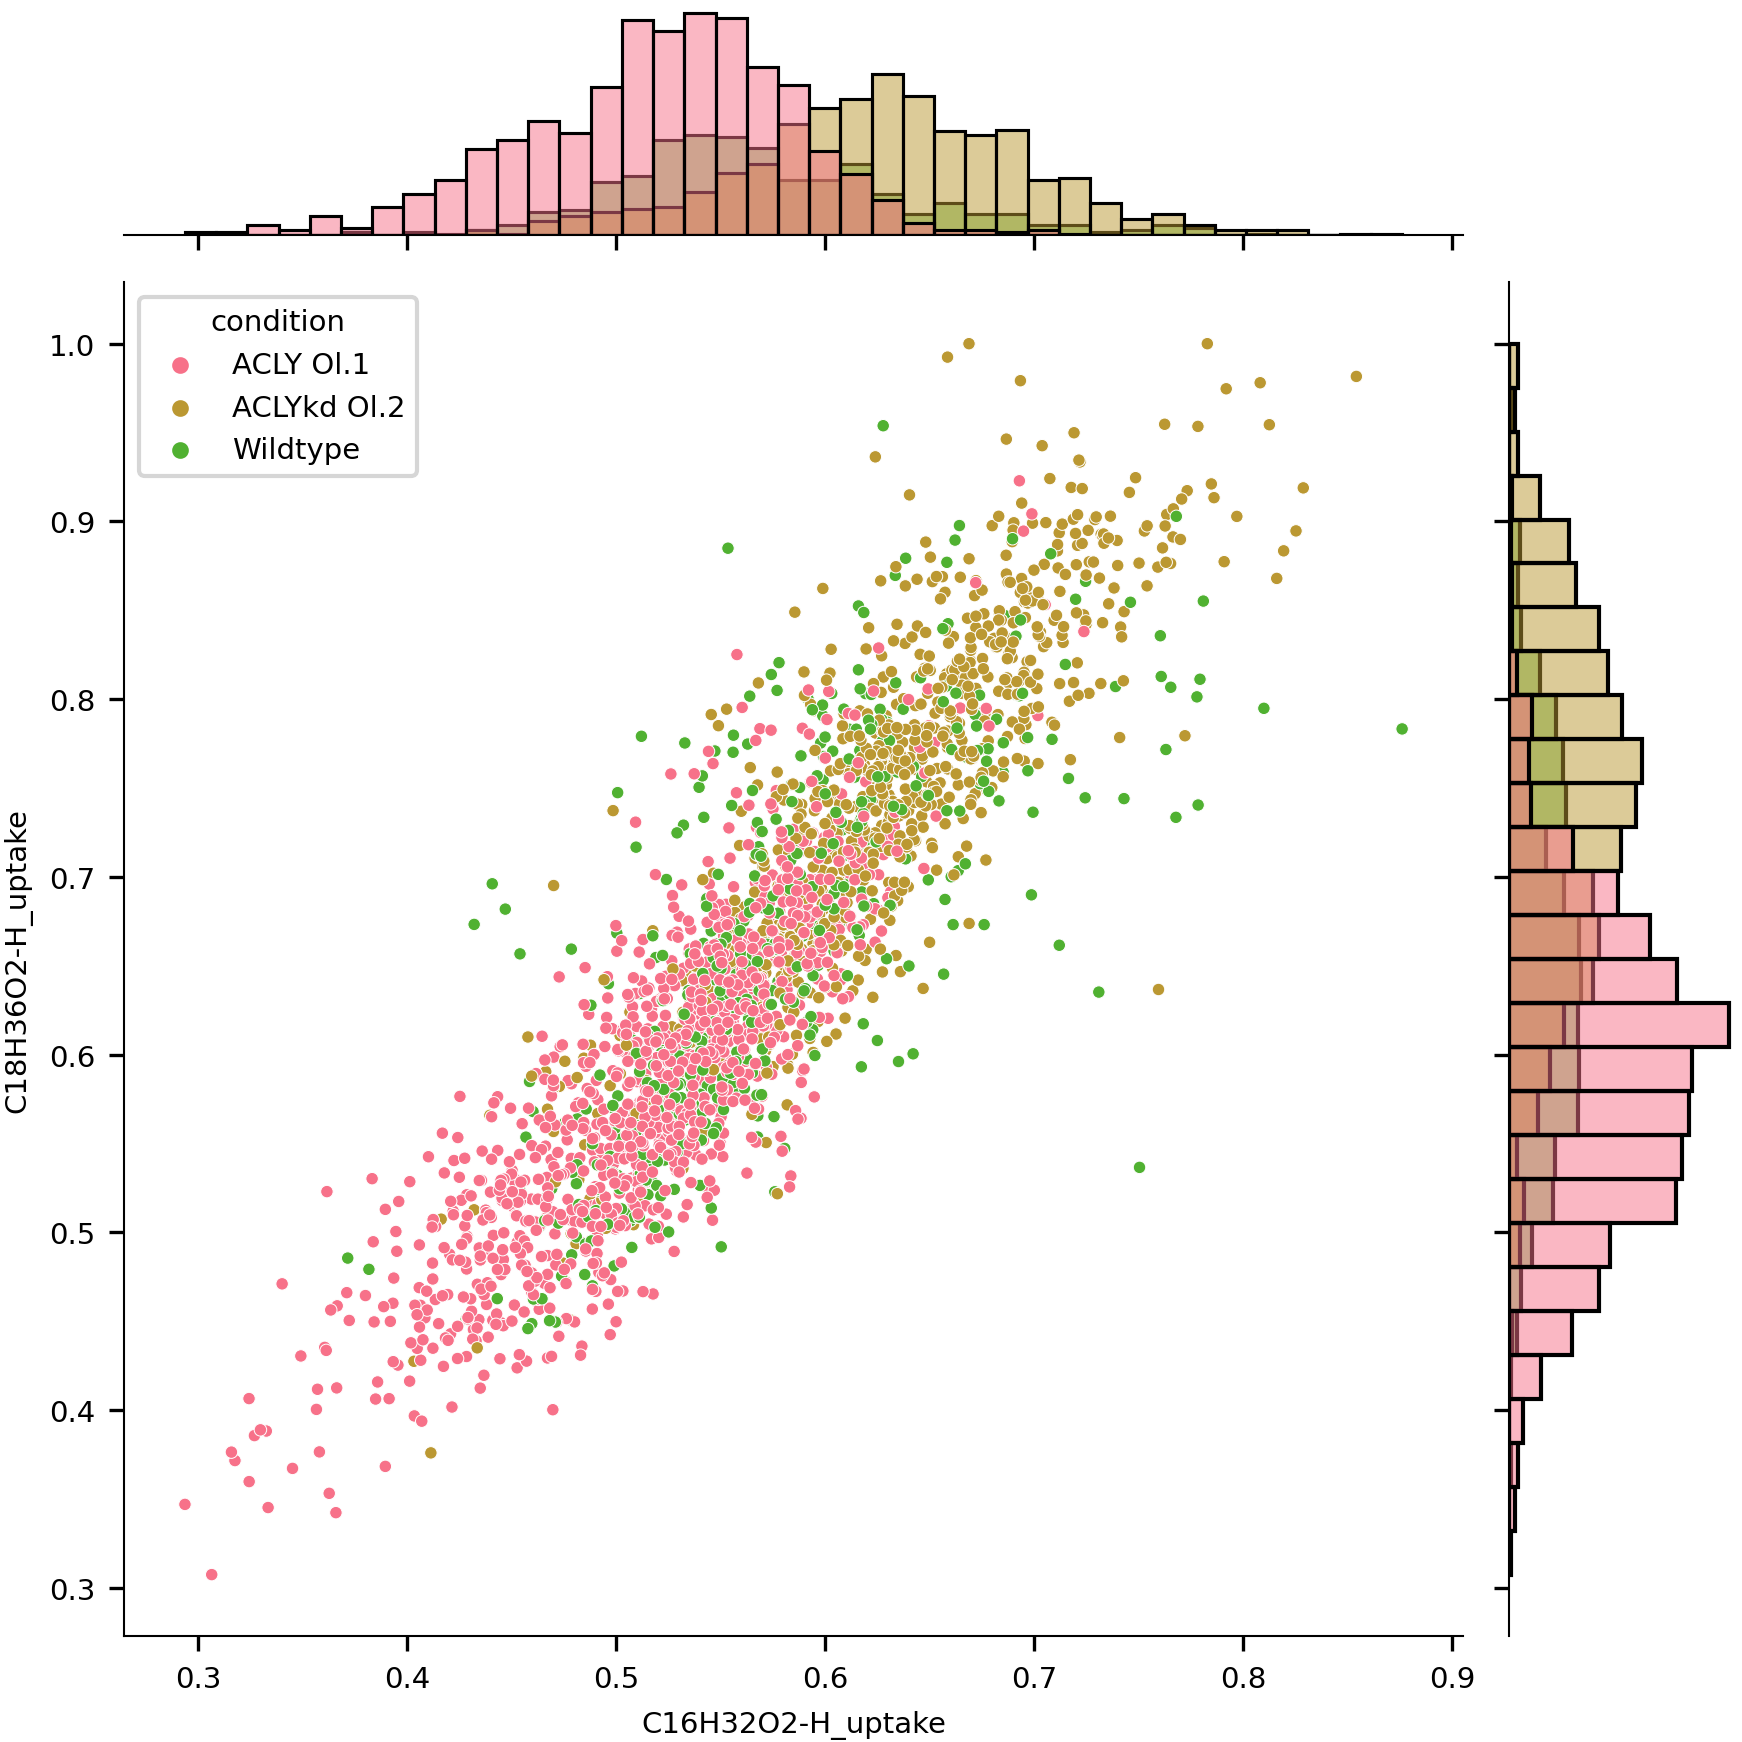

In [5]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_uptake'
y_col = 'C18H36O2-H_uptake'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition")
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_%s_%s_%s.png"%("condition", x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s_%s.svg"%("condition", x_col, y_col)))

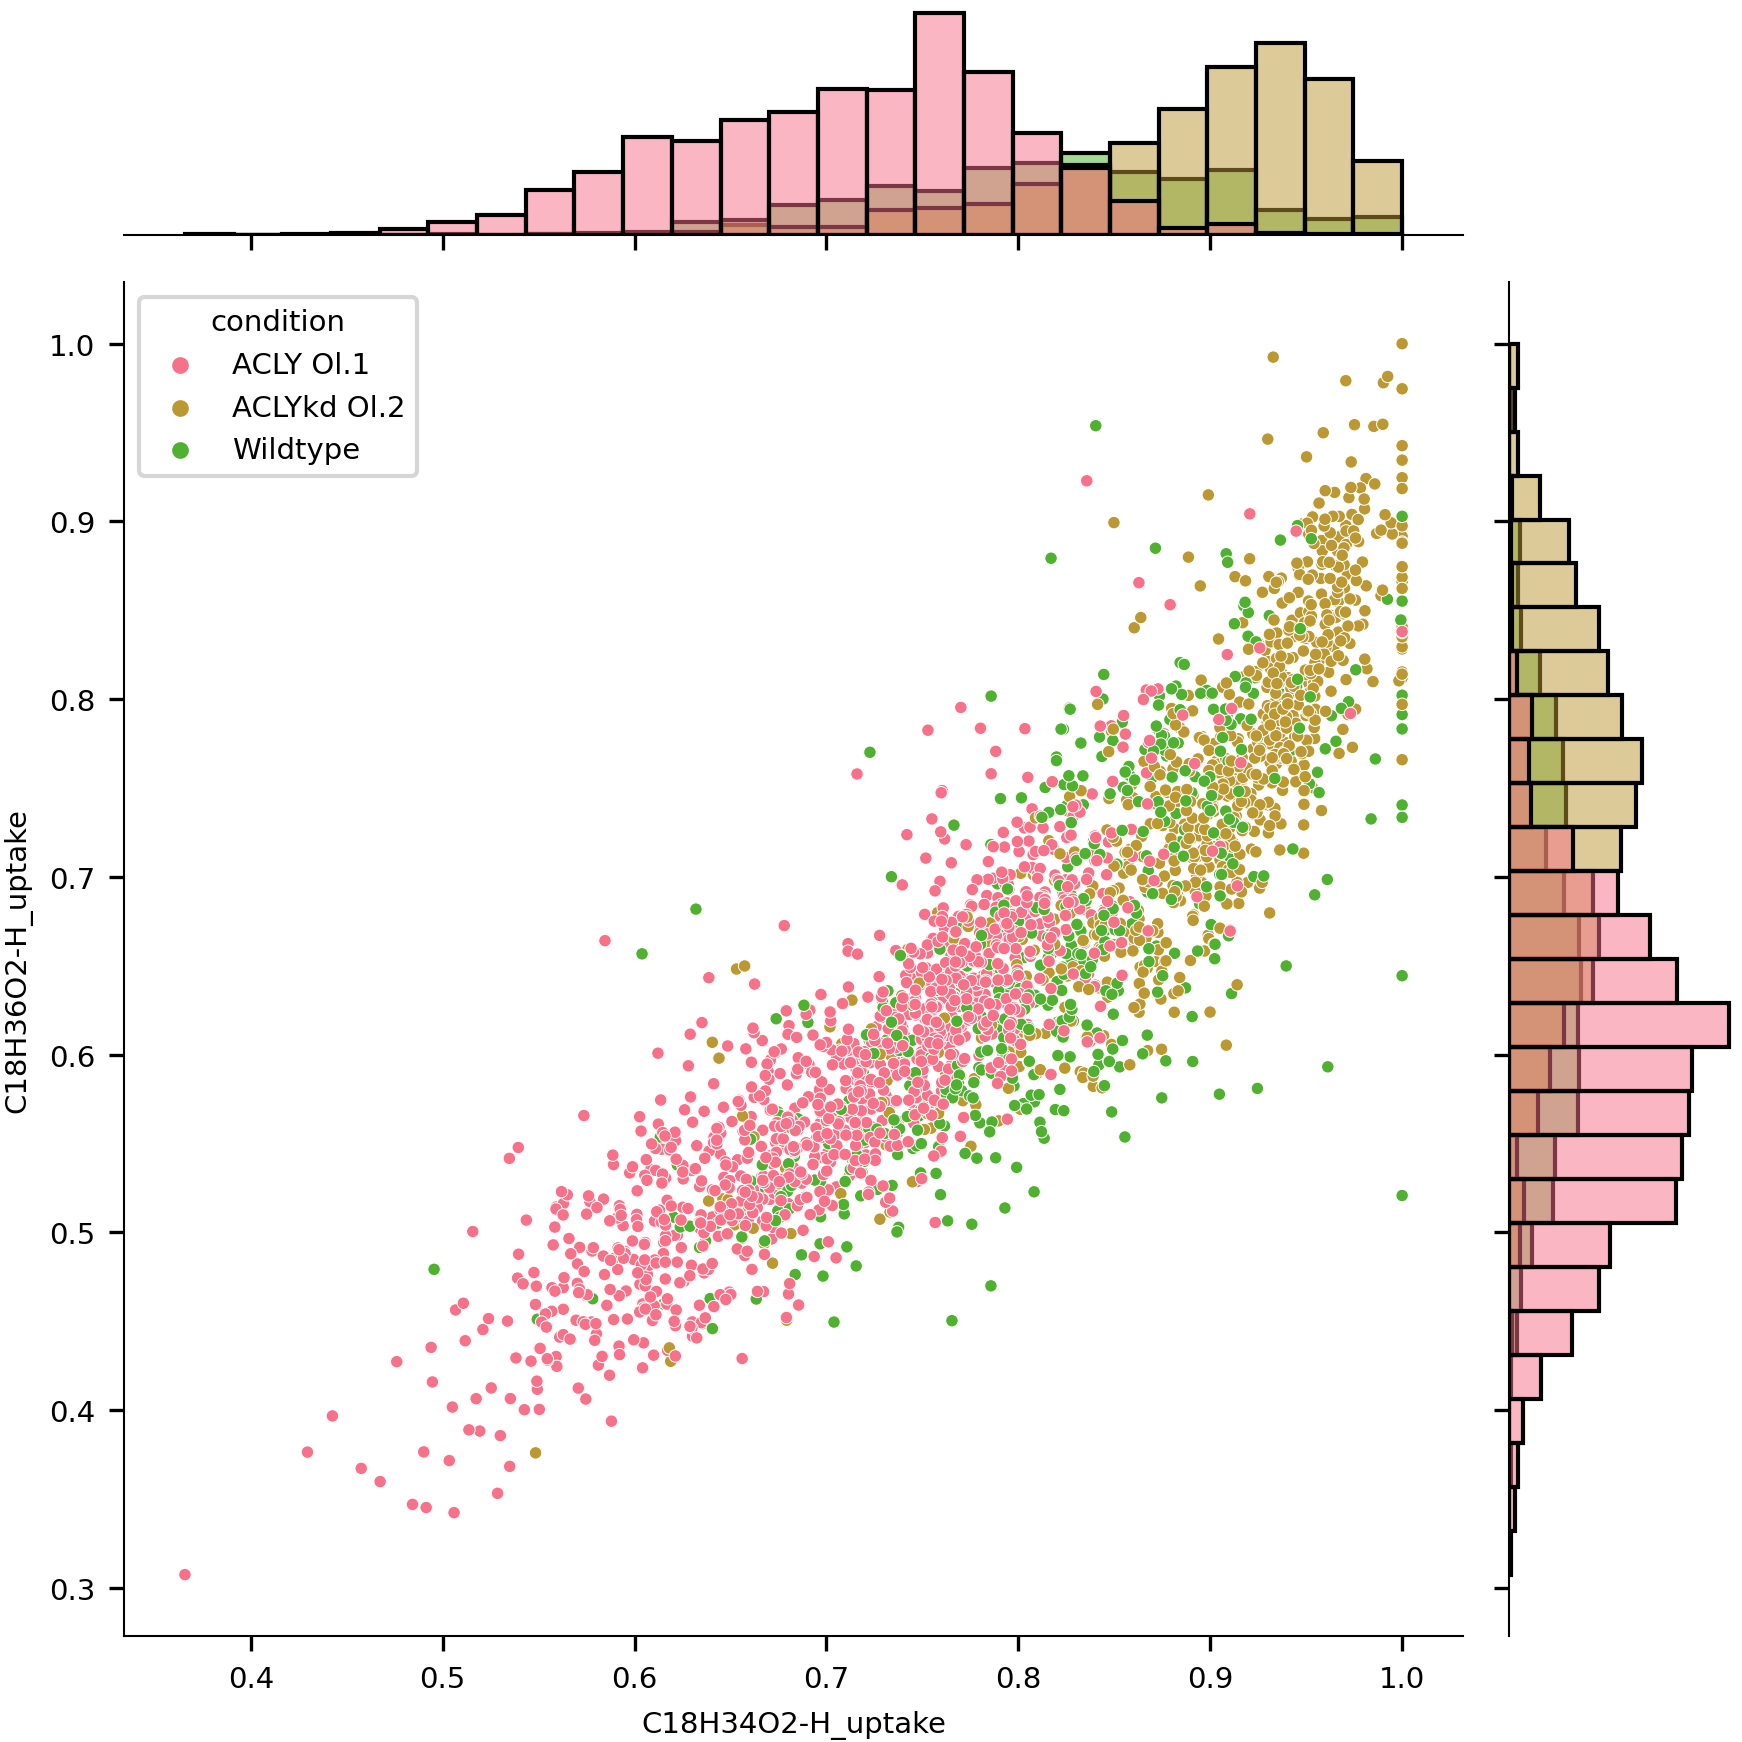

In [8]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C18H34O2-H_uptake'
y_col = 'C18H36O2-H_uptake'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition")
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_%s_%s_%s.png"%("condition", x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s_%s.svg"%("condition", x_col, y_col)))

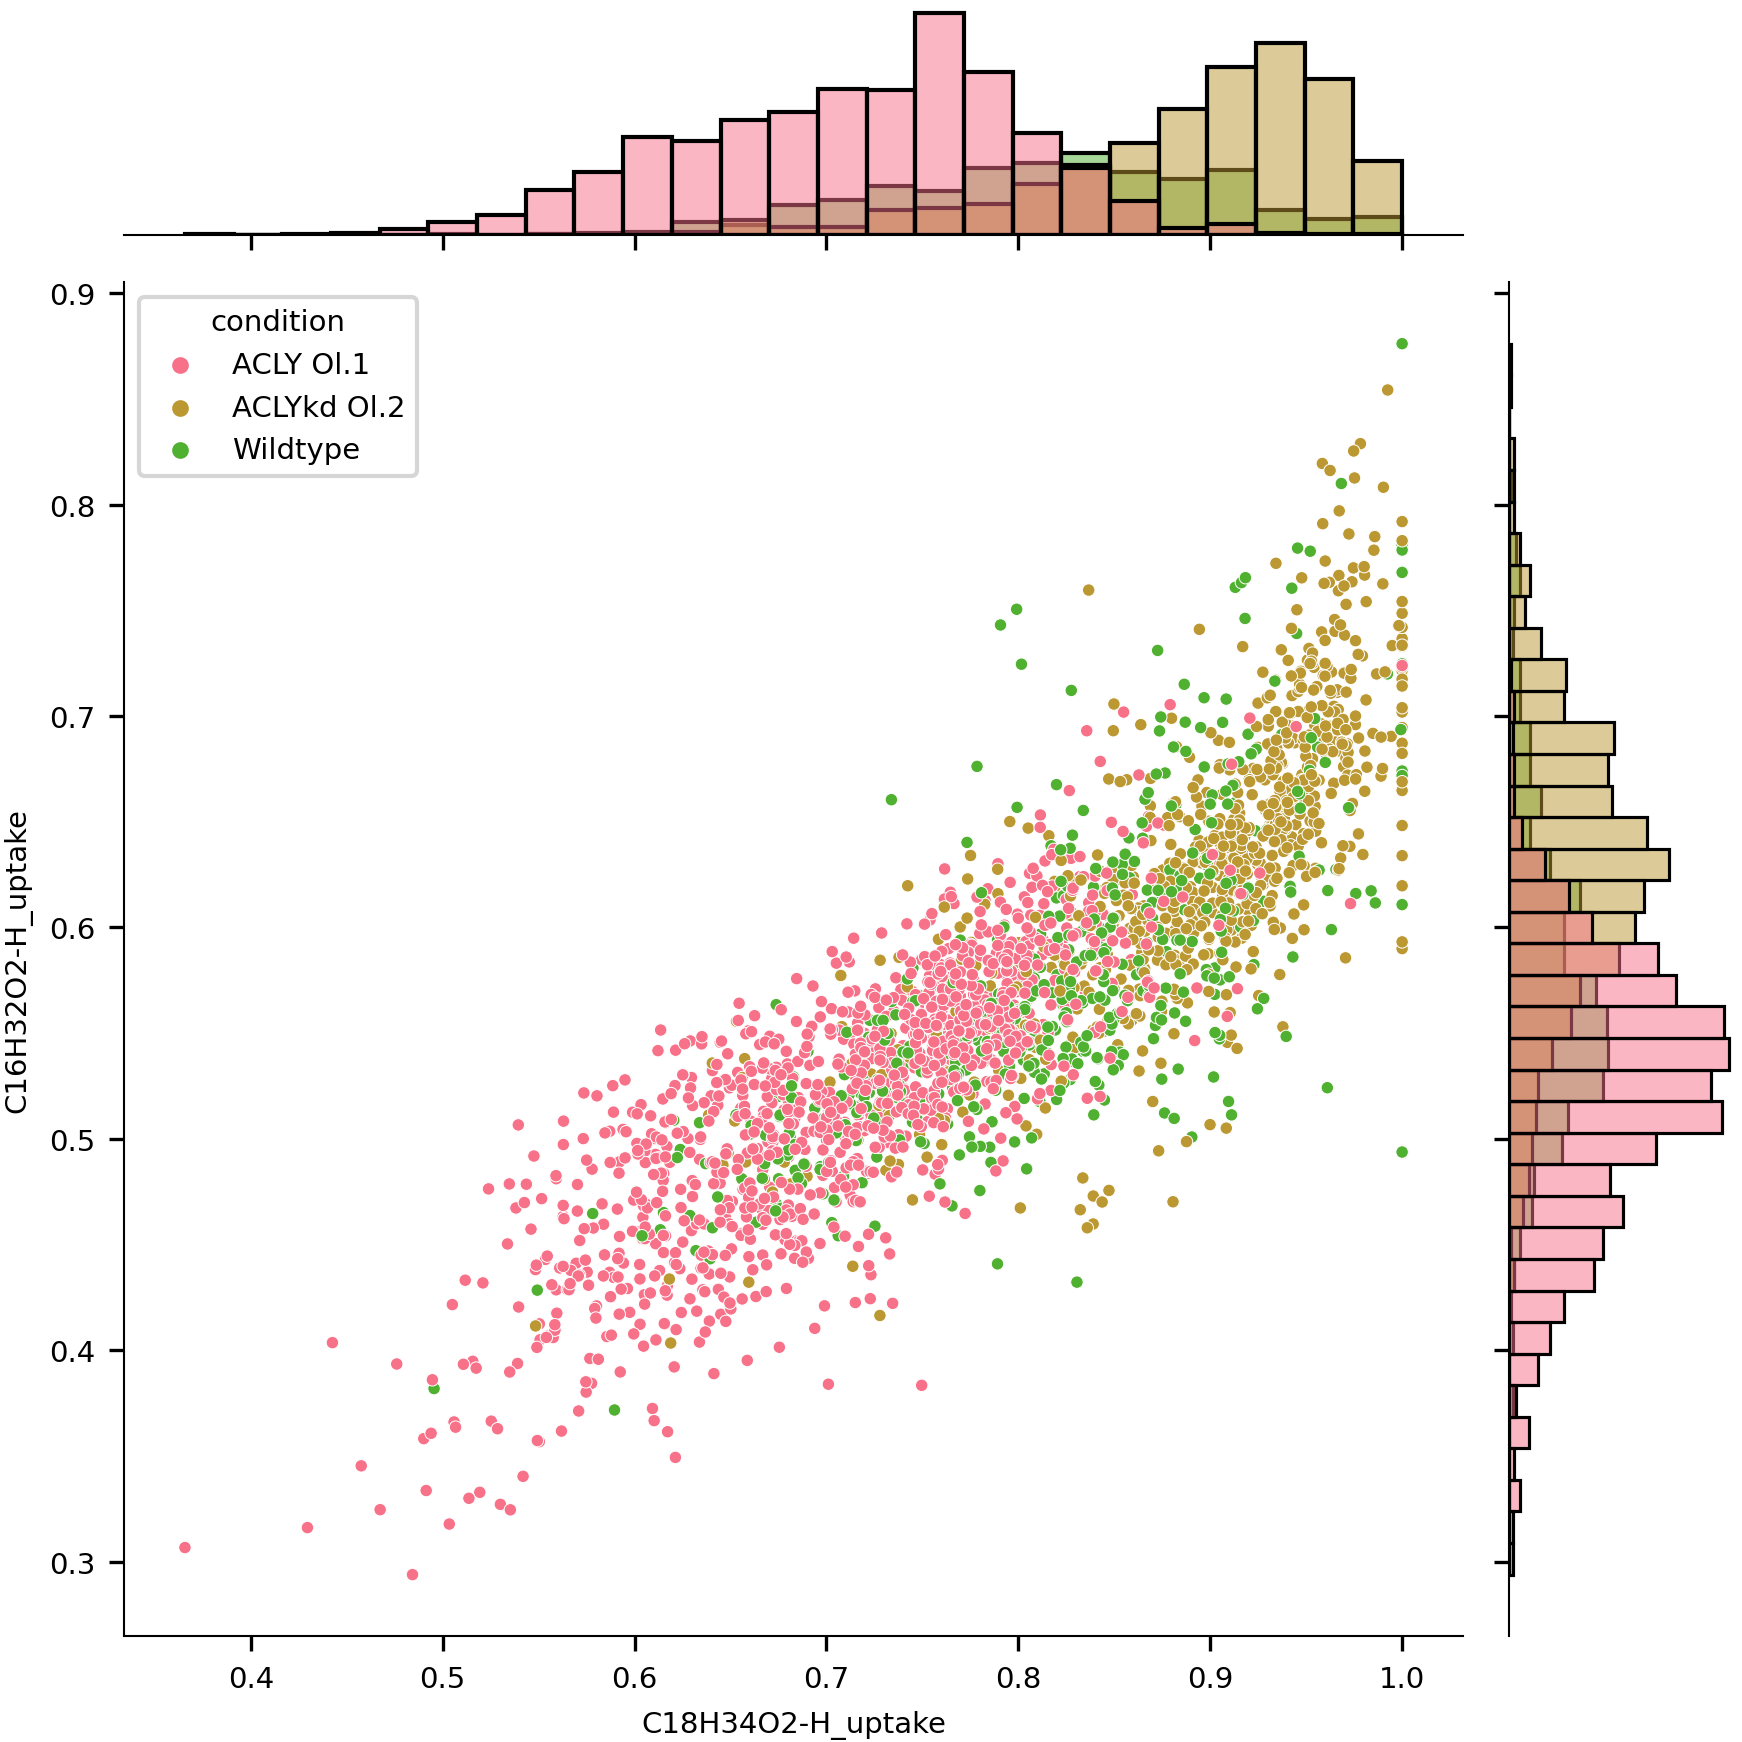

In [9]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C18H34O2-H_uptake'
y_col = 'C16H32O2-H_uptake'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition")
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_%s_%s_%s.png"%("condition", x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s_%s.svg"%("condition", x_col, y_col)))

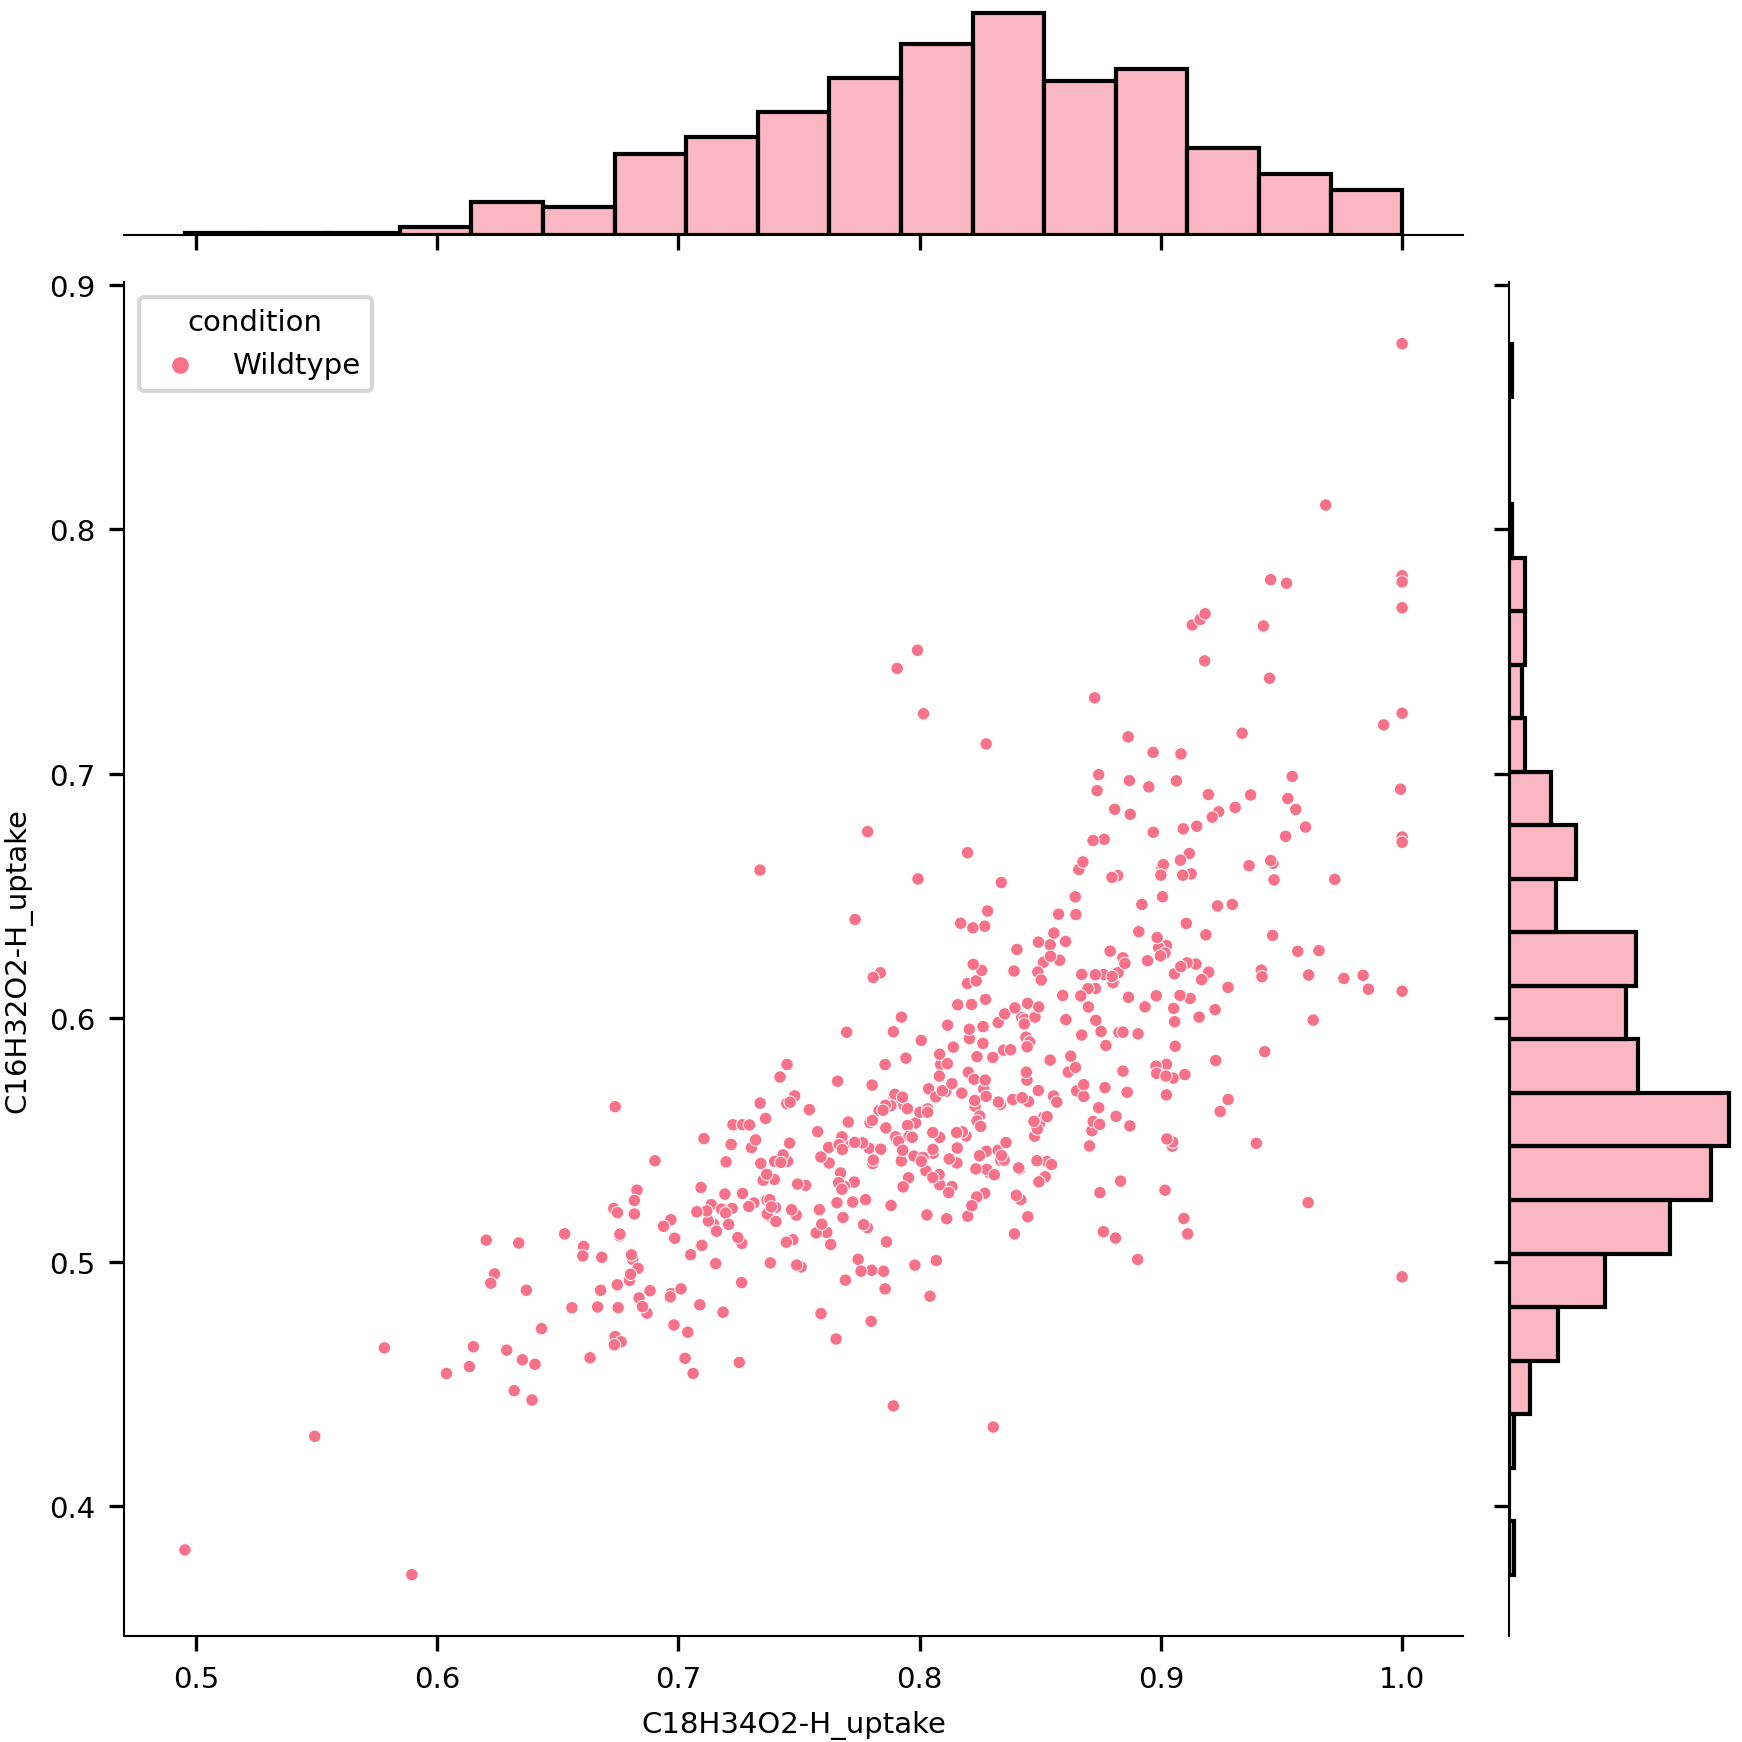

In [53]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled") & ((adata.obs.condition == "Wildtype"))].obs
x_col = 'C18H34O2-H_uptake'
y_col = 'C16H32O2-H_uptake'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition")
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("WT_%s_%s_%s.png"%("condition", x_col, y_col)))
plt.savefig(plots_path / ("WT_%s_%s_%s.svg"%("condition", x_col, y_col)))

In [12]:
adata.obs['condition']

cell_id
13868-S1W1-0    ACLYkd Ol.2 + Wildtype
13869-S1W1-0    ACLYkd Ol.2 + Wildtype
13870-S1W1-0    ACLYkd Ol.2 + Wildtype
13871-S1W1-0    ACLYkd Ol.2 + Wildtype
13872-S1W1-0    ACLYkd Ol.2 + Wildtype
                         ...          
8769-S3W8-2                   Wildtype
8771-S3W8-2                   Wildtype
8773-S3W8-2                   Wildtype
8774-S3W8-2                   Wildtype
8824-S3W8-2                   Wildtype
Name: condition, Length: 6257, dtype: category
Categories (5, object): ['ACLY Ol.1', 'ACLY Ol.1 + Wildtype', 'ACLYkd Ol.2', 'ACLYkd Ol.2 + Wildtype', 'Wildtype']

In [15]:
adata.var.index

Index(['C18H36O2-H', '[13C]C17H36O2-H', '[13C]2C16H36O2-H', '[13C]3C15H36O2-H',
       '[13C]4C14H36O2-H', '[13C]5C13H36O2-H', '[13C]6C12H36O2-H',
       '[13C]7C11H36O2-H', '[13C]8C10H36O2-H', '[13C]9C9H36O2-H',
       '[13C]10C8H36O2-H', '[13C]11C7H36O2-H', '[13C]12C6H36O2-H',
       '[13C]13C5H36O2-H', '[13C]14C4H36O2-H', '[13C]15C3H36O2-H',
       '[13C]16C2H36O2-H', '[13C]17CH36O2-H', '[13C]18H36O2-H', 'C18H34O2-H',
       '[13C]C17H34O2-H', '[13C]2C16H34O2-H', '[13C]3C15H34O2-H',
       '[13C]4C14H34O2-H', '[13C]5C13H34O2-H', '[13C]6C12H34O2-H',
       '[13C]7C11H34O2-H', '[13C]8C10H34O2-H', '[13C]9C9H34O2-H',
       '[13C]10C8H34O2-H', '[13C]11C7H34O2-H', '[13C]12C6H34O2-H',
       '[13C]13C5H34O2-H', '[13C]14C4H34O2-H', '[13C]15C3H34O2-H',
       '[13C]16C2H34O2-H', '[13C]17CH34O2-H', '[13C]18H34O2-H', 'C16H32O2-H',
       '[13C]C15H32O2-H', '[13C]2C14H32O2-H', '[13C]3C13H32O2-H',
       '[13C]4C12H32O2-H', '[13C]5C11H32O2-H', '[13C]6C10H32O2-H',
       '[13C]7C9H32O2-H', '[13C

In [17]:
adata

AnnData object with n_obs × n_vars = 6257 × 87
    obs: 'center_x', 'center_y', 'cell_area', 'cell_sampling_area', 'cell_sampling_ratio', 'cell_nearest_am_distance', 'cell_nearest_cell_distance', 'centroid-0', 'centroid-1', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3', 'local_centroid-0', 'local_centroid-1', 'area', 'filled_area', 'solidity', 'perimeter', 'eccentricity', 'euler_number', 'moments_hu-0', 'moments_hu-1', 'moments_hu-2', 'moments_hu-3', 'moments_hu-4', 'moments_hu-5', 'moments_hu-6', 'moments_central-0-0', 'moments_central-0-1', 'moments_central-0-2', 'moments_central-0-3', 'moments_central-1-0', 'moments_central-1-1', 'moments_central-1-2', 'moments_central-1-3', 'moments_central-2-0', 'moments_central-2-1', 'moments_central-2-2', 'moments_central-2-3', 'moments_central-3-0', 'moments_central-3-1', 'moments_central-3-2', 'moments_central-3-3', 'inertia_tensor_eigvals-0', 'inertia_tensor_eigvals-1', 'major_axis_length', 'minor_axis_length', 'weighted_moments_central-0-0-Dapi', '

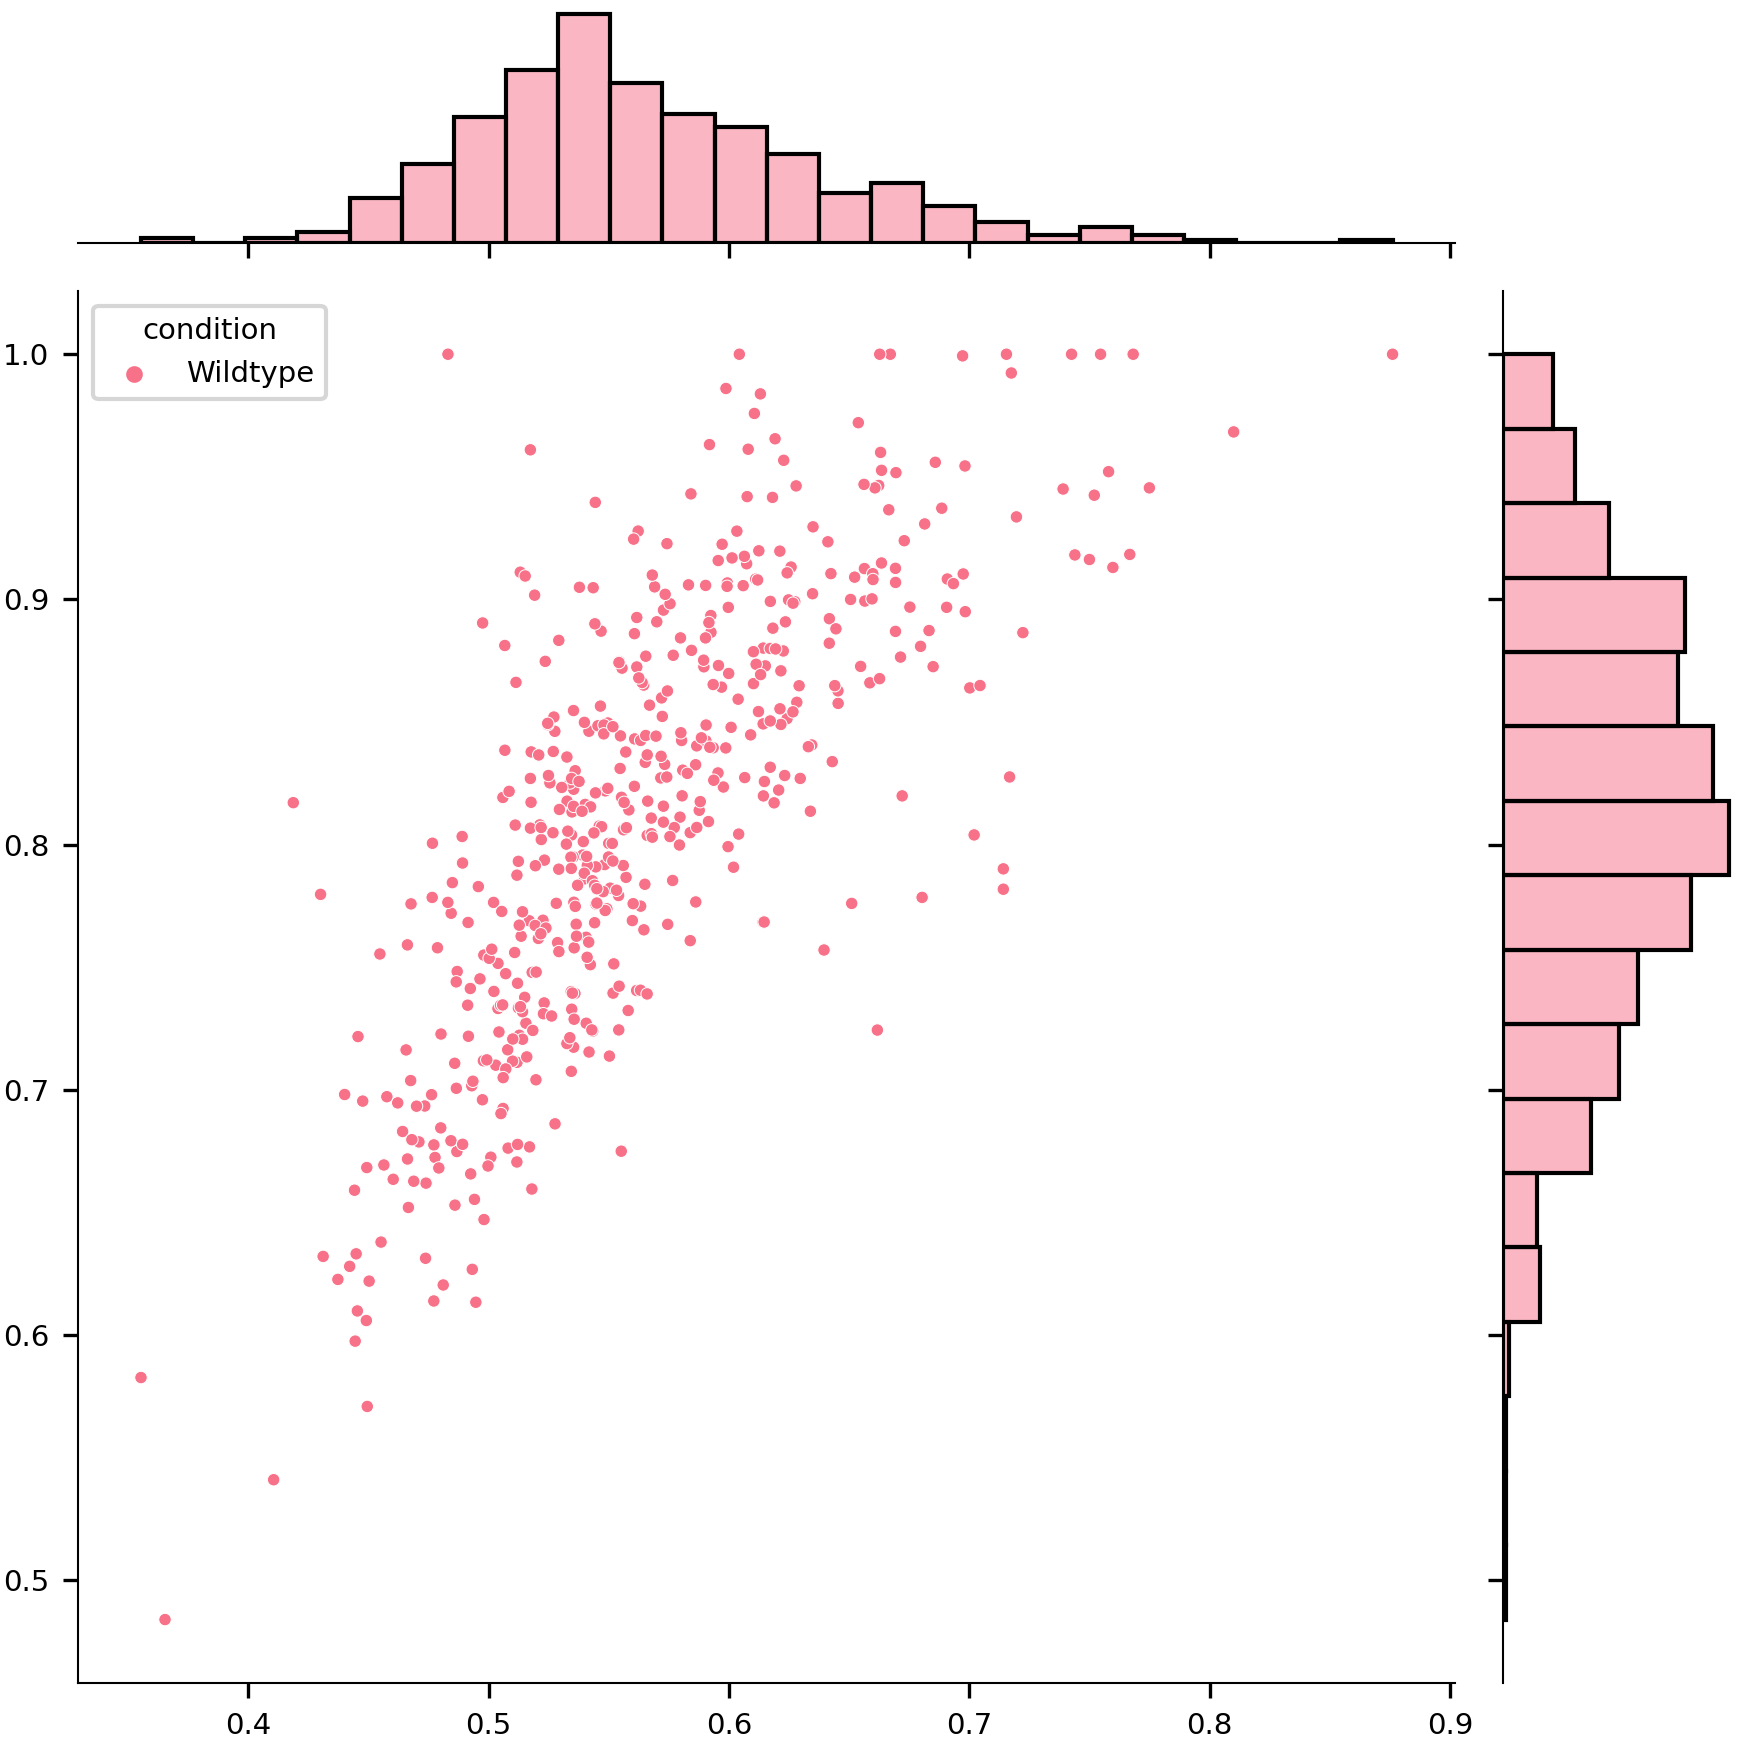

In [32]:
adata_filtered = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled") & ((adata.obs.condition == "Wildtype"))]
x_col = 'C16H32O2-H'
y_col = 'C18H34O2-H'

p = sns.JointGrid(y=adata_filtered[:, y_col].layers["corr_norm"].T[0], x=adata_filtered[:, x_col].layers["corr_norm"].T[0], hue=adata_filtered.obs["condition"])
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("WT_M0_%s_%s_%s.png"%("condition", x_col, y_col)))
plt.savefig(plots_path / ("WT_M0_%s_%s_%s.svg"%("condition", x_col, y_col)))

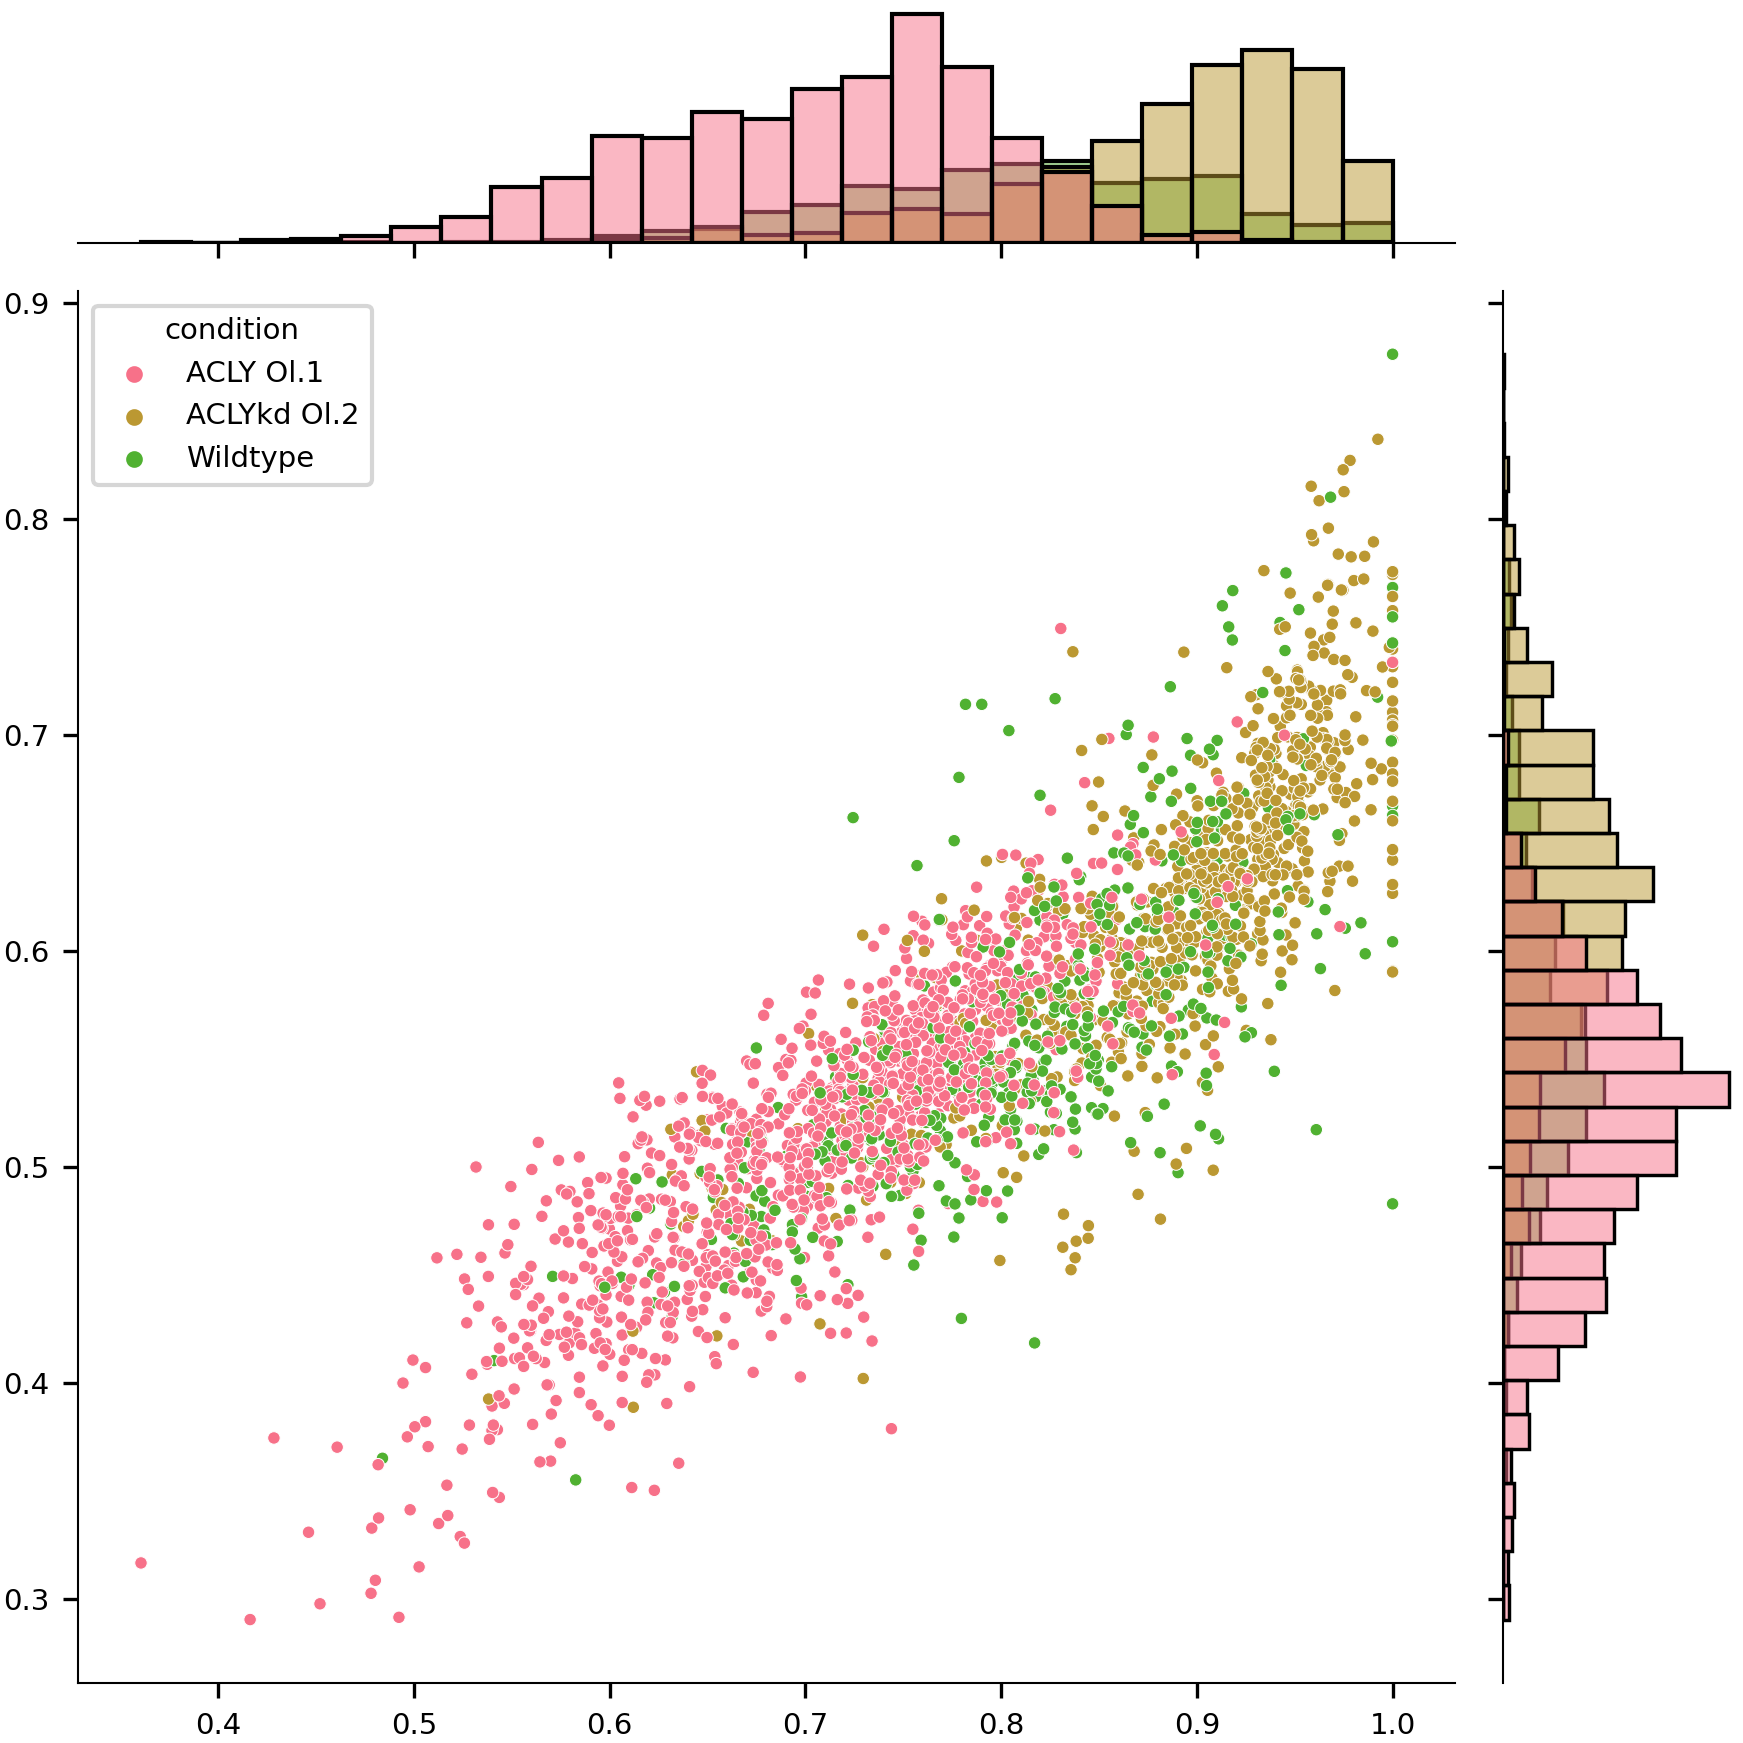

In [52]:
adata_filtered = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")]
x_col = 'C18H34O2-H'
y_col = 'C16H32O2-H'

p = sns.JointGrid(y=adata_filtered[:, y_col].layers["corr_norm"].T[0], x=adata_filtered[:, x_col].layers["corr_norm"].T[0], hue=adata_filtered.obs["condition"])
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_M0_%s_%s_%s.png"%("condition", x_col, y_col)))
plt.savefig(plots_path / ("separate_M0_%s_%s_%s.svg"%("condition", x_col, y_col)))

In [30]:
adata_filtered[:, 'C18H36O2-H'].layers["corr_norm"].T[0]

ArrayView([0.56143687, 0.60840316, 0.71530723, 0.67721632, 0.7305293 ,
           0.67457102, 0.57530838, 0.44561443, 0.84245671, 0.62602854,
           0.75707904, 0.52280126, 0.77168851, 0.7102118 , 0.71575714,
           0.85520095, 0.6773252 , 0.75248518, 0.56980744, 0.66594686,
           0.59396794, 0.73025611, 0.80712651, 0.7358618 , 0.66502909,
           0.67503759, 0.53876383, 0.65323331, 0.66357715, 0.86632847,
           0.78031856, 0.65226131, 0.62938629, 0.61791311, 0.6572133 ,
           0.76591163, 0.55596948, 0.8022436 , 0.78856241, 0.72816526,
           0.77747985, 0.72558947, 0.74077082, 0.72935223, 0.75645536,
           0.72057561, 0.84895027, 0.84702537, 0.58803615, 0.64518757,
           0.63836556, 0.77009442, 0.68429628, 0.79520333, 0.63885984,
           0.64794163, 0.56709047, 0.55154161, 0.67326412, 0.63276536,
           0.78528469, 0.66621813, 0.59702496, 0.77537066, 0.66465555,
           0.61278053, 0.45015142, 0.60268866, 0.76812318, 0.83544488,
      

In [37]:
adata

AnnData object with n_obs × n_vars = 6257 × 87
    obs: 'center_x', 'center_y', 'cell_area', 'cell_sampling_area', 'cell_sampling_ratio', 'cell_nearest_am_distance', 'cell_nearest_cell_distance', 'centroid-0', 'centroid-1', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3', 'local_centroid-0', 'local_centroid-1', 'area', 'filled_area', 'solidity', 'perimeter', 'eccentricity', 'euler_number', 'moments_hu-0', 'moments_hu-1', 'moments_hu-2', 'moments_hu-3', 'moments_hu-4', 'moments_hu-5', 'moments_hu-6', 'moments_central-0-0', 'moments_central-0-1', 'moments_central-0-2', 'moments_central-0-3', 'moments_central-1-0', 'moments_central-1-1', 'moments_central-1-2', 'moments_central-1-3', 'moments_central-2-0', 'moments_central-2-1', 'moments_central-2-2', 'moments_central-2-3', 'moments_central-3-0', 'moments_central-3-1', 'moments_central-3-2', 'moments_central-3-3', 'inertia_tensor_eigvals-0', 'inertia_tensor_eigvals-1', 'major_axis_length', 'minor_axis_length', 'weighted_moments_central-0-0-Dapi', '

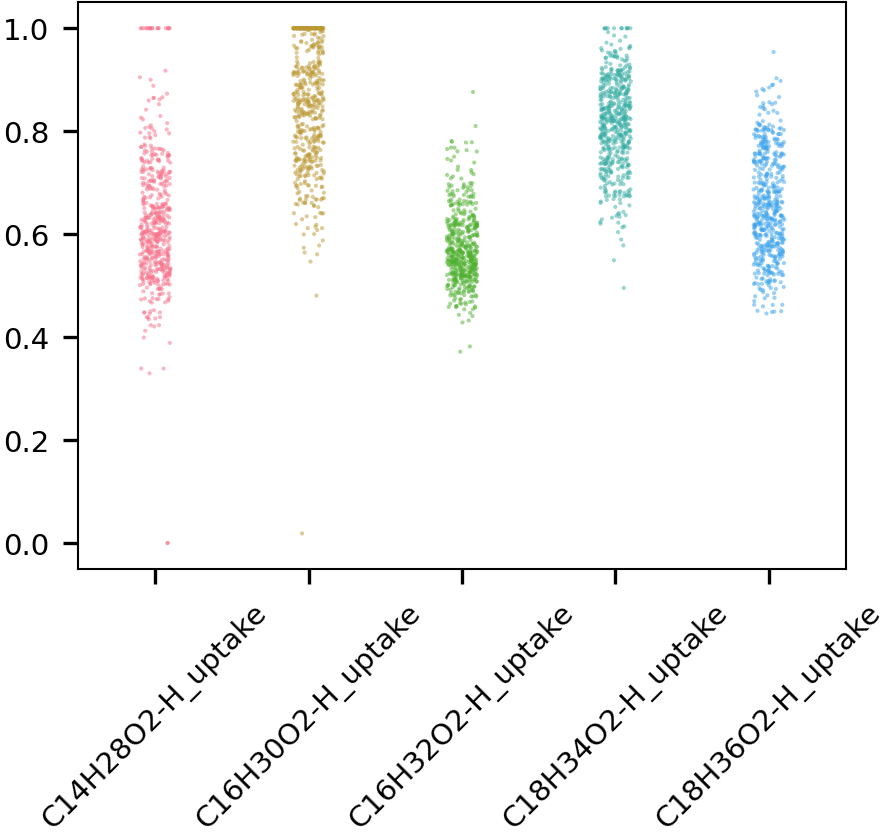

In [50]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled") & ((adata.obs.condition == "Wildtype"))].obs
df_uptake = df[['C14H28O2-H_uptake', 'C16H30O2-H_uptake', 'C16H32O2-H_uptake', 'C18H34O2-H_uptake', 'C18H36O2-H_uptake']]
sns.stripplot(data=df_uptake, alpha=0.5, s=1)
plt.xticks(rotation=45)

plt.savefig(plots_path / ("FA_uptake.png"))
plt.savefig(plots_path / ("FA_uptake.svg"))

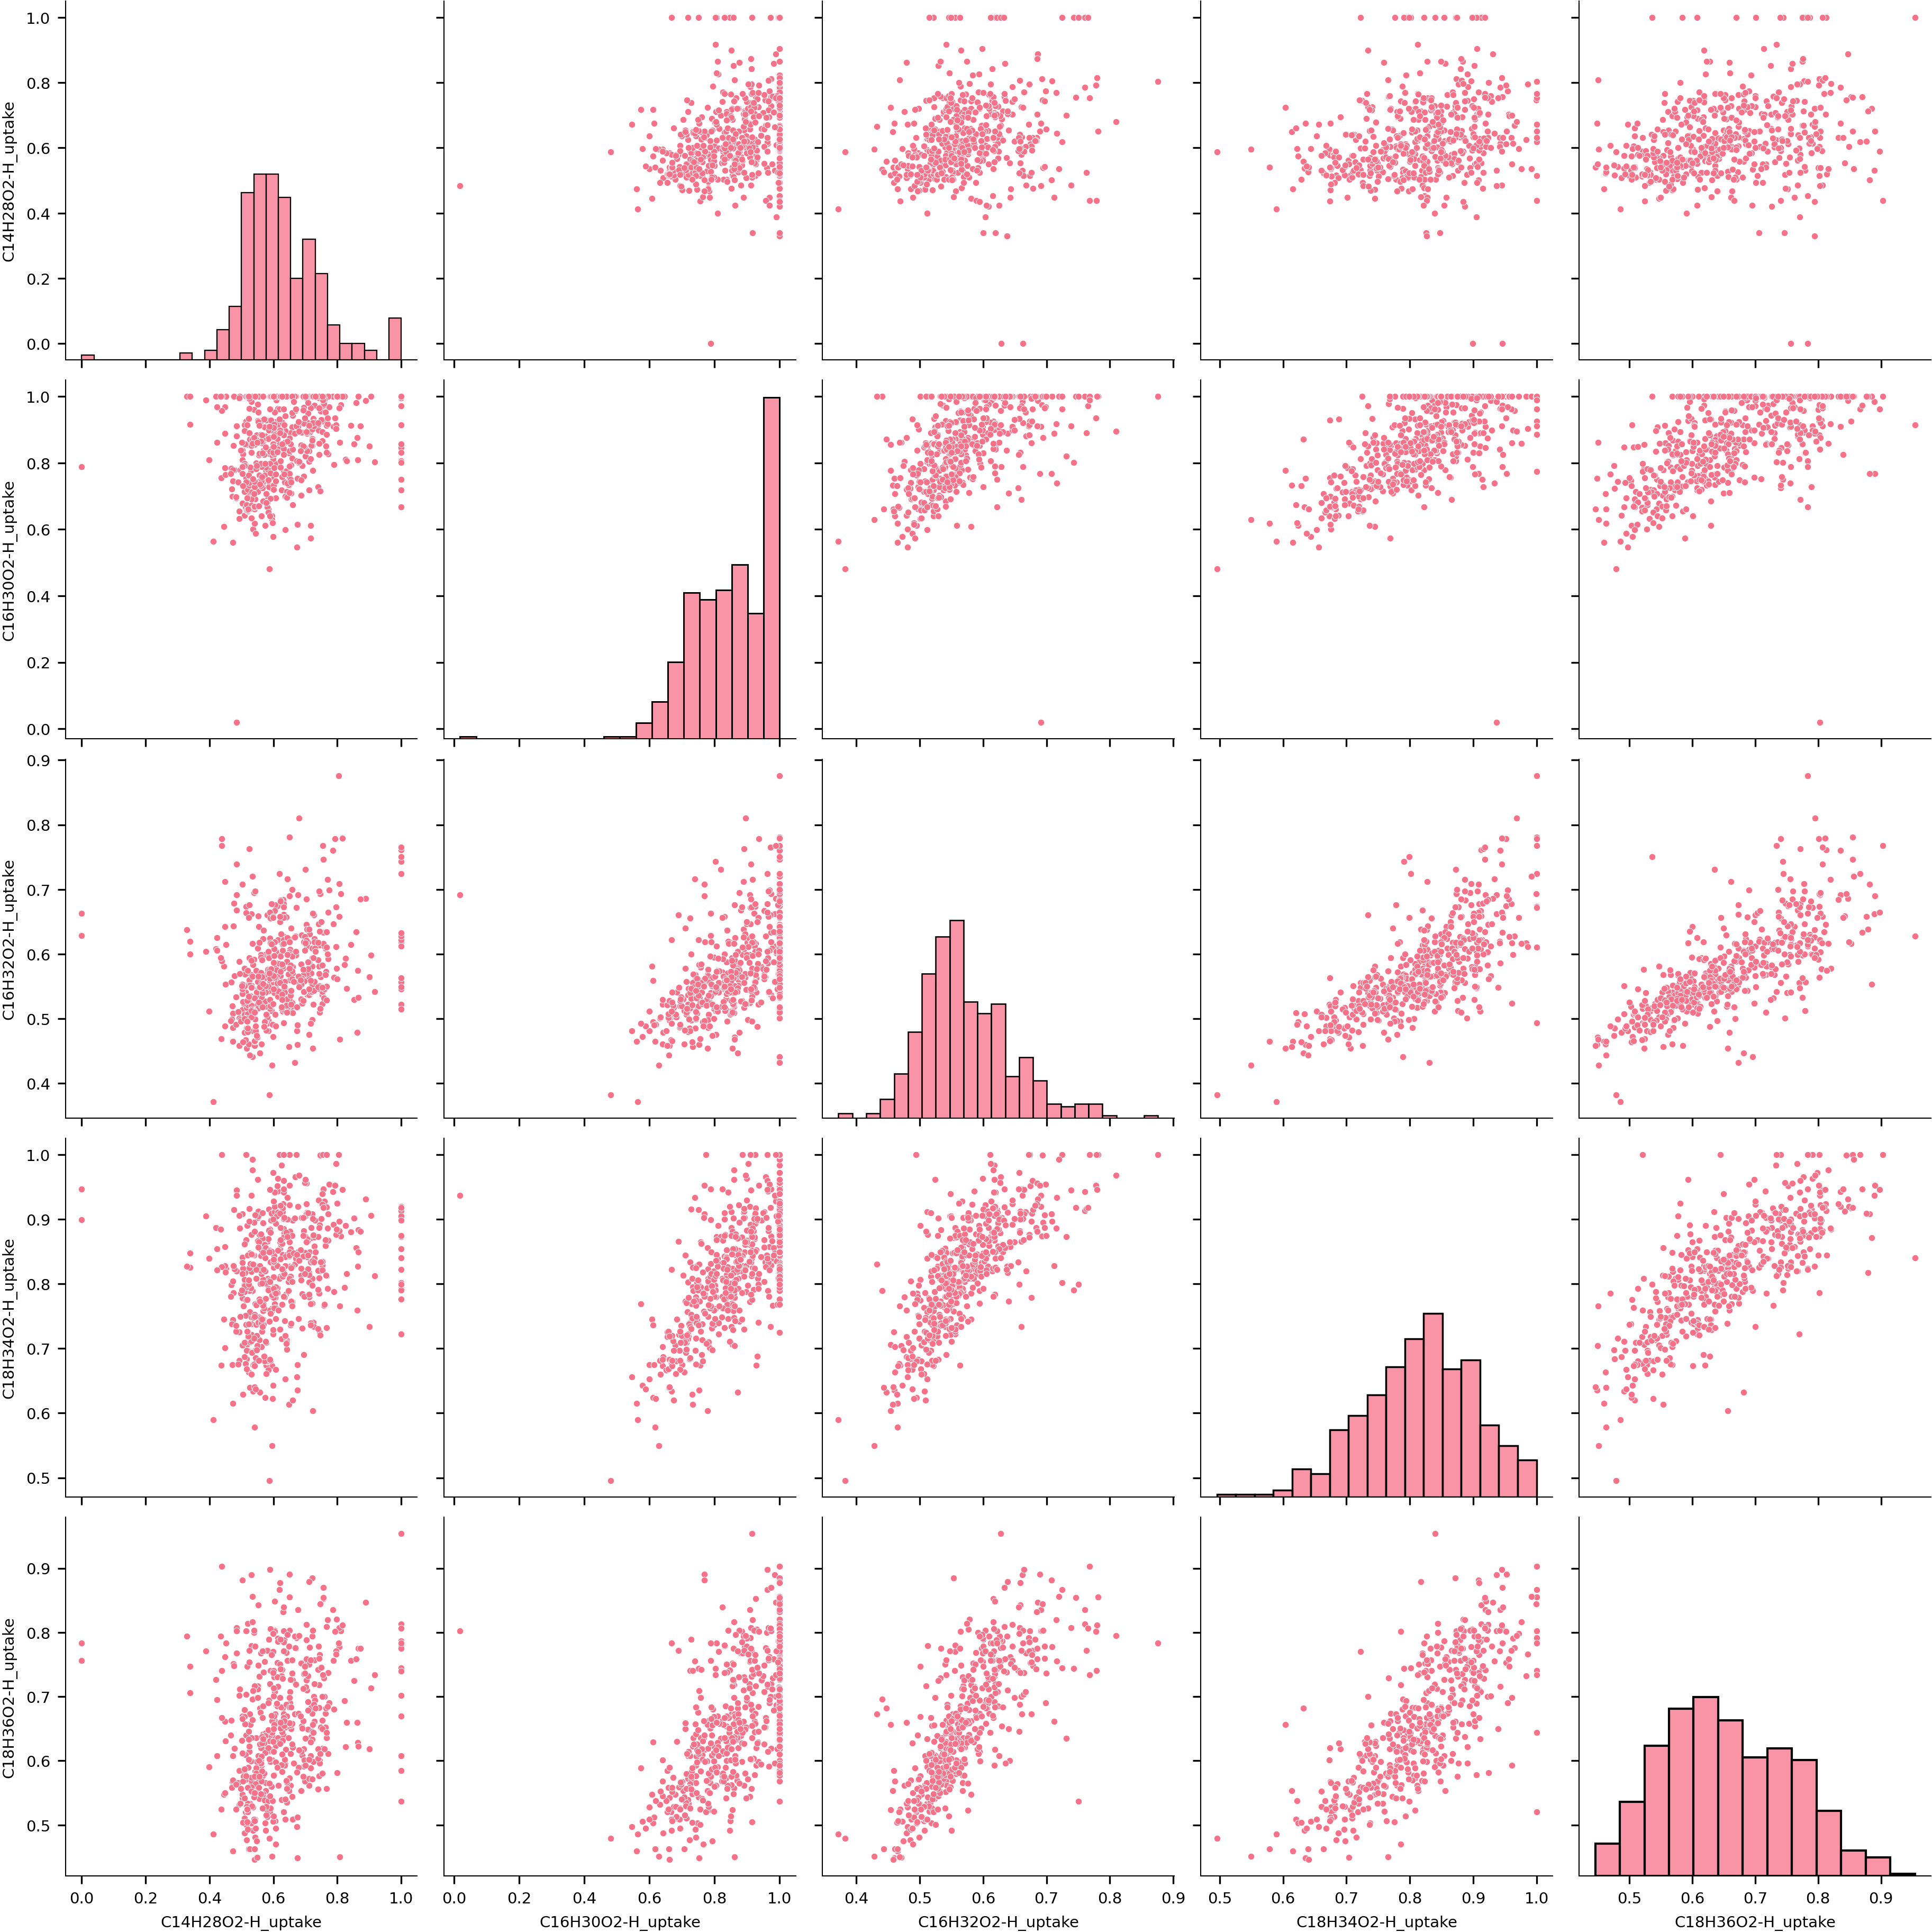

In [51]:
sns.pairplot(df_uptake)
plt.savefig(plots_path / ("FA_uptake_pairplot.png"))
plt.savefig(plots_path / ("FA_uptake_pairplot.svg"))